In [276]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [5]:
key = '74d877047a3fb120cb0dbdc0cd8fbd0f22b65cbe'

In [6]:
df = pdr.get_data_tiingo('AAPL',api_key = key)

In [7]:
df.to_csv('AAPL.csv')

In [8]:
df = pd.read_csv('AAPL.csv')

In [9]:
df2= df.reset_index()['close']

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
1,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
2,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
3,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
4,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.20,316.68,27876215,319.23,319.52,316.20,316.68,27876215,0.0,1.0
1253,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.87,318.66,25672211,316.85,320.89,315.87,318.66,25672211,0.0,1.0
1254,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.35,315.77,20450754,318.89,319.23,315.35,315.77,20450754,0.0,1.0
1255,AAPL,2020-05-26 00:00:00+00:00,316.73,324.24,316.50,323.50,31380454,316.73,324.24,316.50,323.50,31380454,0.0,1.0
1256,AAPL,2020-05-27 00:00:00+00:00,318.11,318.71,313.09,316.14,28236274,318.11,318.71,313.09,316.14,28236274,0.0,1.0


In [12]:
df1 = df.reset_index()['close']

In [13]:
df1.shape

(1257,)

In [14]:
df1

0       130.535
1       129.960
2       130.120
3       129.360
4       128.650
         ...   
1252    319.230
1253    316.850
1254    318.890
1255    316.730
1256    318.110
Name: close, Length: 1257, dtype: float64

Text(0.5, 1.0, 'AAPL Price 5 year data')

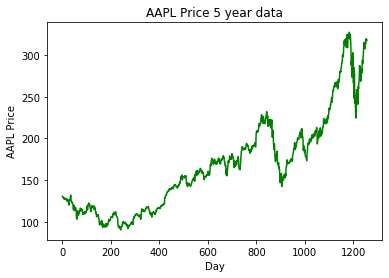

In [15]:
plt.plot(df1,color = 'green')
plt.xlabel('Day')
plt.ylabel('AAPL Price')
plt.title('AAPL Price 5 year data')

<center><B>LSTM are sensitive to the scale of the data, so we apply MinMax scaler</B></center>

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [102]:
print(df1)

[[0.1696994 ]
 [0.16727181]
 [0.16794731]
 ...
 [0.96491598]
 [0.95579667]
 [0.9616229 ]]


In [18]:
#Splitting the data into training data and test data 
#is crucial to determine efficiency of the model

In [19]:
training_size = int(len(df1)*0.65)
test_size = len(df1)- training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [105]:
training_size, test_size

(817, 440)

In [106]:
train_data

array([[0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.11863548],
       [0.10259225],
       [0.1058009 ],
       [0.104

In [20]:
#Convert an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i +time_step,0])
    return np.array(dataX), np.array(dataY)

In [21]:
 #reshape into X = t, t+1, t+2, t+3 and Y= t+4

time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test,ytest = create_dataset(test_data,time_step)

In [22]:
print(X_train)

[[0.1696994  0.16727181 0.16794731 ... 0.0873934  0.09030651 0.09891919]
 [0.16727181 0.16794731 0.16473866 ... 0.09030651 0.09891919 0.09887697]
 [0.16794731 0.16473866 0.16174111 ... 0.09891919 0.09887697 0.10622309]
 ...
 [0.32694419 0.32230009 0.32951955 ... 0.51920966 0.53719497 0.52824453]
 [0.32230009 0.32951955 0.34311408 ... 0.53719497 0.52824453 0.52647133]
 [0.32951955 0.34311408 0.34813814 ... 0.52824453 0.52647133 0.52651355]]


In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [25]:
#reshape input to be [samples,time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [107]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [108]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.fit(X_train,y_train,validation_data = (X_test,ytest),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0193 - val_loss: 0.0424
Epoch 2/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 3/100
12/12 [==============================] - 1s 100ms/step - loss: 8.8902e-04 - val_loss: 0.0061
Epoch 4/100
12/12 [==============================] - 1s 99ms/step - loss: 6.8746e-04 - val_loss: 0.0034
Epoch 5/100
12/12 [==============================] - 1s 100ms/step - loss: 6.5613e-04 - val_loss: 0.0033
Epoch 6/100
12/12 [==============================] - 1s 100ms/step - loss: 5.8259e-04 - val_loss: 0.0033
Epoch 7/100
12/12 [==============================] - 1s 101ms/step - loss: 5.7793e-04 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 1s 99ms/step - loss: 5.5722e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 1s 98ms/step - loss: 5.6351e-04 - val_loss: 0.0031
Epoch 10/100
12/12 [==============================] - 1s 107ms/ste

In [111]:
#Prediction and performance metrics
import tensorflow as tf
tf.__version__

'2.2.0'

In [44]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [45]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [68]:
math.sqrt(mean_squared_error(y_train,train_predict))

143.8134259529812

In [69]:
####Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

243.71677176949015

<function matplotlib.pyplot.show(*args, **kw)>

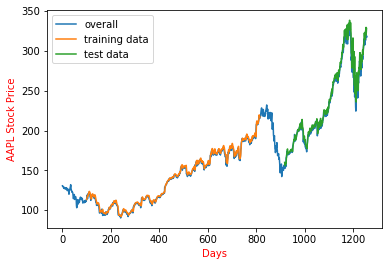

In [67]:
###plotting
#shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict) +look_back*2 +1:len(df1)-1,:]=test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label = 'overall')
plt.plot(trainPredictPlot,label = 'training data')
plt.plot(testPredictPlot, label = 'test data')
plt.xlabel('Days',color = 'red')
plt.ylabel('AAPL Stock Price', color = 'red')
plt.legend()
plt.show

In [112]:
len(test_data)

440

In [267]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [268]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.8232711306256861,
 0.7814320695769654,
 0.66659630161276

In [269]:
from numpy import array

In [270]:
lst_output =[]
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print('{} day input{}'.format(i,x_input))
        x_input = x_input.reshape(-1,1)
        x_input = x_input.reshape((1,n_steps,1))
        #Print(x_input)
        yhat = model.predict(x_input,verbose = 0)
        print('{} day output{}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i +1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i +1
print(lst_output)
len(lst_output)

[0.9561345]
101
1 day input[0.88431985 0.87836697 0.8986321  0.92582116 0.92877649 0.95676771
 0.93869797 0.93304061 0.94950604 0.96424048 0.95512117 0.95989192
 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106
 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.94

30

In [271]:
len(df1)

1257

In [272]:
df3 = df1.tolist()
df3.extend(lst_output)

In [273]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
len(day_pred)

30

Text(0.5, 1.0, 'LSTM MODEL FOR AAPL STOCK')

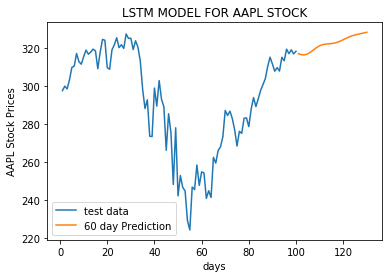

In [274]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]), label = 'test data ')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label = '60 day Prediction')
plt.legend()
plt.xlabel('days')
plt.ylabel('AAPL Stock Prices')
plt.title('LSTM MODEL FOR AAPL STOCK')

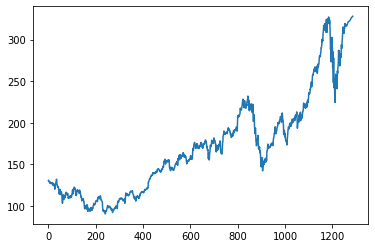

In [275]:
df3 = df1.tolist()
df3.extend(lst_output)
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)